# **StreamSmart: Personalized Movie Recommendations**

## 🚦 Overview
1. Business Understanding
2. Data Understanding / EDA
3. Data Preparation & Splits
4. Baselines & KNN CF
5. SVD / ALS & Hybrid
6. Evaluation, (Optional) Ensemble Re-ranker, Conclusion

---

## 🎯 **Business Understanding**

Intro, stakeholder, long-tail problem, success metric

---

## 🔎 **Data Understanding / EDA**

### 1. Importing Libraries and Setup

Before diving into the data, we need to import a number of Python libraries that will help us handle, manipulate, and analyze the dataset.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Surprise library for recommendation systems
from surprise import Dataset, Reader, accuracy
from surprise import KNNBasic, KNNWithMeans, SVD, NMF
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split

# Set style for plots
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")
%matplotlib inline


### 2. Data Loading and Initial Exploration

- In this section we load all the core MovieLens datasets i.e **movies, ratings, links, and tags** into a pandas DataFrame.

- Then we merge these datasets into a single comprehensive DataFrame called movie_data, combining movie details, user ratings, external links, and user-generated tags.

- The merging process ensures that all ratings are retained, even if some movies lack tags.

- Finally, we shall print the shape of the merged DataFrame and displays its first few rows, allowing you to verify that the data has been loaded and combined correctly for further analysis.

---

In [2]:
# Load all datasets
movies = pd.read_csv('Data/ml-latest-small/movies.csv')
ratings = pd.read_csv('Data/ml-latest-small/ratings.csv')
links = pd.read_csv('Data/ml-latest-small/links.csv')
tags = pd.read_csv('Data/ml-latest-small/tags.csv')

# Merge movies with ratings
movie_data = pd.merge(movies, ratings, on='movieId')

# Merge with links
movie_data = pd.merge(movie_data, links, on='movieId')

# Merge with tags (left join to keep all ratings, even if no tag)
movie_data = pd.merge(movie_data, tags[['movieId', 'userId', 'tag', 'timestamp']], 
                      on=['movieId', 'userId'], how='left', suffixes=('_rating', '_tag'))

# Inspect the final dataframe
print("Movie Data Shape:", movie_data.shape)
movie_data.head()

Movie Data Shape: (102677, 10)


,movieId,title,genres,userId,rating,timestamp_rating,imdbId,tmdbId,tag,timestamp_tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,114709,862.0,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,114709,862.0,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,114709,862.0,NaN,NaN


We're using:

**NumPy and Pandas** for data manipulation

**Matplotlib** and **Seaborn** for visualization

**Surprise library** which is specifically designed for building recommendation systems

We're **filtering out warnings** to keep the output clean

Setting a **consistent visual style** for our plots

### 3. Dataset Overview and Basic Statistics

- Here we observe a summary of the MovieLens dataset after merging all sources.

- It reports the number of unique users, movies, ratings, and tags, then displays descriptive statistics for the ratings (such as mean, standard deviation, minimum, and maximum).
 
- Finally, we visualize the distribution of ratings using a bar plot, helping us understand how users rate movies and revealing any trends or biases in the rating behavior.

Dataset Info:
Number of users: 610
Number of movies: 9724
Number of ratings: 102677
Number of tags: 3476

Rating Statistics:
count    102677.000000
mean          3.514813
std           1.043133
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


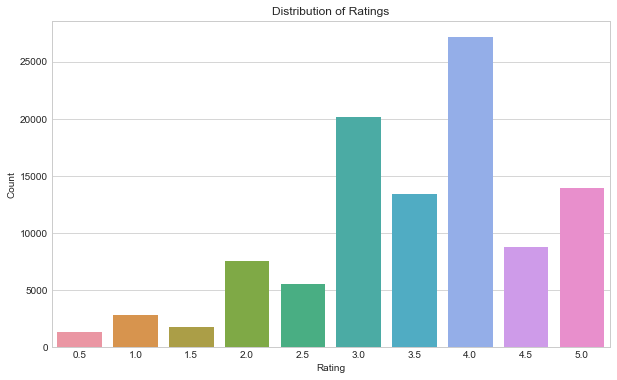

In [3]:
# Basic information about the dataset
print("Dataset Info:")
print(f"Number of users: {movie_data['userId'].nunique()}")
print(f"Number of movies: {movie_data['movieId'].nunique()}")
print(f"Number of ratings: {len(movie_data)}")
print(f"Number of tags: {movie_data['tag'].notna().sum()}")

# Rating statistics
print("\nRating Statistics:")
print(movie_data['rating'].describe())

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=movie_data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## 🧪 **Data Preparation & Splits**

Chronological per-user split, avoid leakage

---

## 🧱 **Baselines & KNN CF**

Popularity, user mean, item mean, user-KNN, item-KNN

---

## 🔬 **SVD / ALS & Hybrid**

SVD, ALS, content-based fallback hybrid

---

## 📊 **Evaluation, Ensemble Re-ranker, & Conclusion**

Compare models, metrics table, stakeholder implications

---